## (Incomplete EDA)

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [84]:
data = pd.read_excel('/content/Foreign_Exchange_Rates.xlsx', na_values='ND')

In [85]:
data.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [86]:
data.shape

(5217, 23)

In [87]:
data.isna().sum()

Time Serie                                     0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            198
EURO AREA - EURO/US$                         198
NEW ZEALAND - NEW ZELAND DOLLAR/US$          198
UNITED KINGDOM - UNITED KINGDOM POUND/US$    198
BRAZIL - REAL/US$                            198
CANADA - CANADIAN DOLLAR/US$                 198
CHINA - YUAN/US$                             197
HONG KONG - HONG KONG DOLLAR/US$             198
INDIA - INDIAN RUPEE/US$                     199
KOREA - WON/US$                              198
MEXICO - MEXICAN PESO/US$                    198
SOUTH AFRICA - RAND/US$                      198
SINGAPORE - SINGAPORE DOLLAR/US$             198
DENMARK - DANISH KRONE/US$                   198
JAPAN - YEN/US$                              198
MALAYSIA - RINGGIT/US$                       198
NORWAY - NORWEGIAN KRONE/US$                 198
SWEDEN - KRONA/US$                           198
SRI LANKA - SRI LANKAN RUPEE/US$             198
SWITZERLAND - FRANC/

In [88]:
data.dropna(inplace=True)

In [89]:
data.shape

(5015, 23)

In [90]:
new_data = {'Time Serie': data['Time Serie'], 'UK': data['UNITED KINGDOM - UNITED KINGDOM POUND/US$'], 'South Africa': data['SOUTH AFRICA - RAND/US$'], 'India': data['INDIA - INDIAN RUPEE/US$']}

In [91]:
df = pd.DataFrame(new_data)

In [92]:
df.head()

,Time Serie,UK,South Africa,India
0,2000-01-03,0.6146,6.126,43.55
1,2000-01-04,0.6109,6.085,43.55
2,2000-01-05,0.6092,6.070,43.55
3,2000-01-06,0.6070,6.080,43.55
4,2000-01-07,0.6104,6.057,43.55


In [93]:
df.duplicated().sum()

0

In [94]:
df.describe()

,UK,South Africa,India
count,5015.000000,5015.000000,5015.000000
mean,0.640466,9.422128,52.726249
std,0.082562,2.831540,9.678708
min,0.473800,5.615000,38.480000
25%,0.587500,7.113750,45.250000
50%,0.636500,8.167100,48.100000
75%,0.692400,11.626250,62.440000
max,0.828700,16.884500,74.330000


### Analysis of UK exchange rate

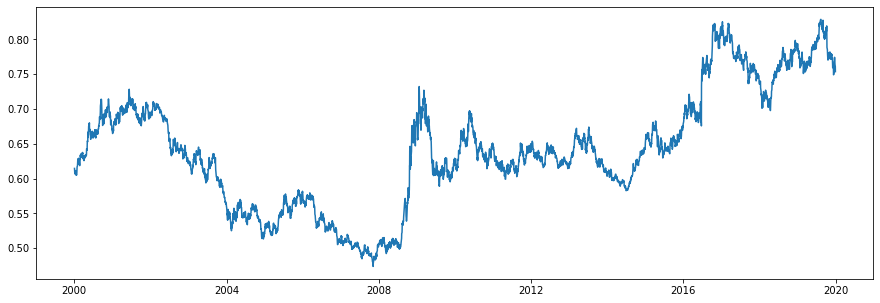

In [95]:

uk_analysis = df[['Time Serie', 'UK']]

arr = uk_analysis
arr.columns = ['a', 'b']

arr.a = arr.a.astype('datetime64')
arr.b = arr.b.astype(float)

plt.figure(figsize=(15, 5))
plt.plot(arr.a, arr.b)

From the trend,  the data is not stationary (mean is not constant)

In [96]:
# check the stationarity of the data with rolling statistics
# check the rolling mean at the year level (12 months)
mean = uk_analysis.rolling(window=12).mean()

# check the rolling standard deviation of the year
std = uk_analysis.rolling(window=12).std()

print(arr.a,mean, std)

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5211   2019-12-24
5213   2019-12-26
5214   2019-12-27
5215   2019-12-30
5216   2019-12-31
Name: a, Length: 5015, dtype: datetime64[ns]              b
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
...        ...
5211  0.762167
5213  0.762892
5214  0.763317
5215  0.763483
5216  0.762833

[5015 rows x 1 columns]              b
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
...        ...
5211  0.007600
5213  0.007797
5214  0.007692
5215  0.007611
5216  0.008122

[5015 rows x 1 columns]


mean and SD is not constant

In [97]:
# Dickey-Fuller test for stationarity with the statsmodel package
from statsmodels.tsa.stattools import adfuller

adfTest = adfuller(uk_analysis['b'], autolag='AIC')

adf = pd.Series(adfTest[0:4],  index=['Test statistics', 'p-value', 'no_of_lags', 'no_of_observations'])
for key, value in adfTest[4].items():
  adf[f'Critical Value {key}'] = value

print(adf)

Test statistics         -1.218446
p-value                  0.665611
no_of_lags              23.000000
no_of_observations    4991.000000
Critical Value 1%       -3.431661
Critical Value 5%       -2.862119
Critical Value 10%      -2.567078
dtype: float64


The p-value obtained is greater than the significance level of 0.05 and the ADF statistic is higher than any of the critical values.

Clearly, there is no reason to reject the null hypothesis. So, the time series(UK exchange rate) is in fact non-stationary.

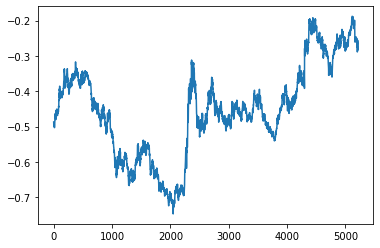

In [98]:
# estimate the trend
uk_analysis_log = np.log(uk_analysis['b'])
plt.plot(uk_analysis_log)

compared to the original, the trends remains the same but the value of y changed

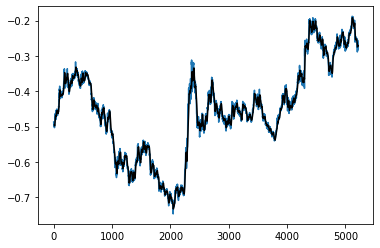

In [99]:
# get the moving average with the same window from before
movingAvg = uk_analysis_log.rolling(window=12).mean()

plt.plot(uk_analysis_log)
plt.plot(movingAvg, color='black')

### Attempts to make the data stationary

1. Log transformations

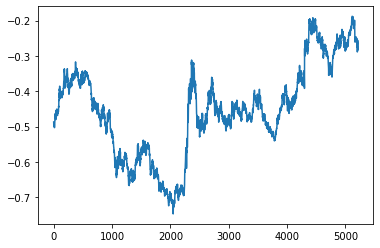

In [100]:
df1 = uk_analysis['b'].apply(np.log)
df1 = np.log(uk_analysis['b']) # equivalent
plt.plot(df1) # equivalent

no much difference with the original